In [35]:
#Q1
import pandas as pd
# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
%matplotlib inline
from sklearn.cluster import KMeans


In [2]:
data=pd.read_csv("KAG_conversion_data.csv")
data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
#Q2 Dummy encoding on object columns.
X=pd.get_dummies(data, columns=["age", "gender"])
X

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.430000,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.820000,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.000000,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.250000,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,109,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,1314411,1178,179978,110,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,1314412,1178,179979,111,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,1314414,1178,179981,113,790253,135,198.710000,8,2,0,0,0,1,1,0


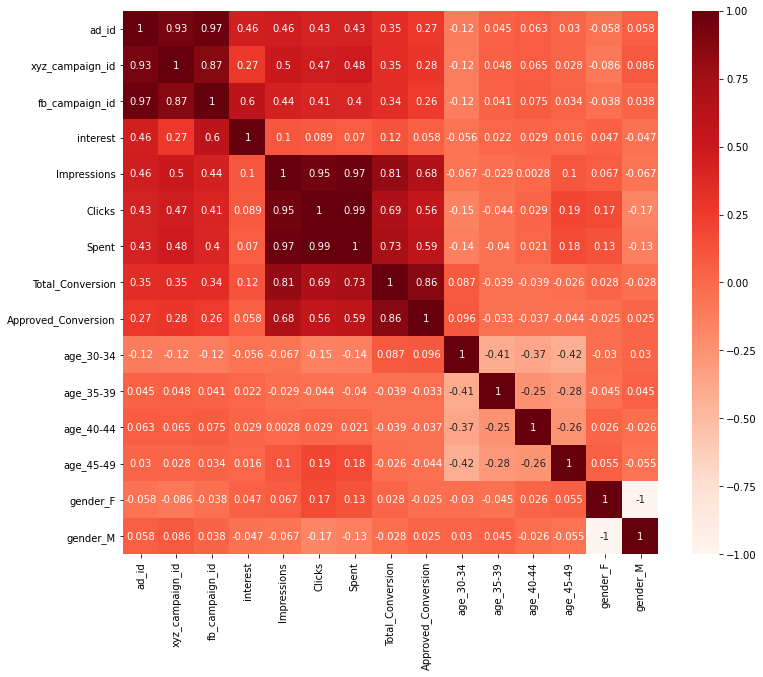

In [5]:
#Q3
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
#Q3a) Drop the first 4 columns of the Dataframe X
X= X.drop(['ad_id','xyz_campaign_id','fb_campaign_id','interest'], axis=1)
X


,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.430000,2,1,1,0,0,0,0,1
1,17861,2,1.820000,2,0,1,0,0,0,0,1
2,693,0,0.000000,1,0,1,0,0,0,0,1
3,4259,1,1.250000,1,0,1,0,0,0,0,1
4,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,790253,135,198.710000,8,2,0,0,0,1,1,0


#Q3 b) They have the same correlation to each other, that is , they are all correlated.

In [12]:
#Q4 a)
#WSS is -Within-Cluster-Sum of Squared , we will store the wss score and use it to create the elbow plot
import sklearn.cluster as cluster
K= range(2,20)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init='k-means++')
    kmeans=kmeans.fit(X)
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)
    



In [13]:
mycenters=pd.DataFrame({'Clusters':K, 'WSS' :wss})
mycenters

,Clusters,WSS
0,2,3.371180e+13
1,3,1.816545e+13
2,4,1.068452e+13
3,5,6.627432e+12
4,6,4.589016e+12
5,7,3.393880e+12
6,8,2.605564e+12
7,9,2.048631e+12
8,10,1.548311e+12
9,11,1.208657e+12


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

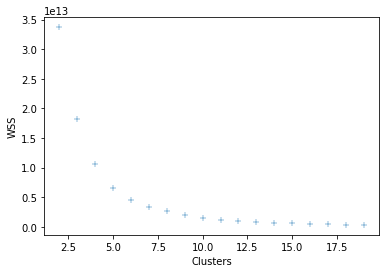

In [15]:
#Q4 b)
sns.scatterplot(x='Clusters', y='WSS', data=mycenters, marker='+')

We can work with 6 clusters

In [24]:
#Q5
#Perform kmeans clustering with 6 clusters
kmeans=cluster.KMeans(n_clusters=6,init='k-means++')
kmeans=kmeans.fit(X)


In [25]:
#PLot clusters on Chart
X['Clusters']=kmeans.labels_

<AxesSubplot:xlabel='Spent', ylabel='Impressions'>

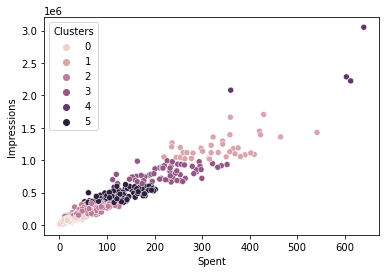

In [26]:
sns.scatterplot(x='Spent',y='Impressions',hue='Clusters', data=X)

In [44]:
#Q6 Predict the labels from the data
km=KMeans(n_clusters=5)
y_means=km.fit_predict(X)
y_means
y_means=pd.DataFrame(y_means)
y_means
#Renaming column 0 to Advert_Type
y_means  = y_means.rename(columns={0:'Advert_Type'})
y_means

,Advert_Type
0,2
1,2
2,2
3,2
4,2
...,...
1138,4
1139,1
1140,0
1141,1


In [45]:
#Q7 concat y+means to dataframe data with name column "Advert_Type"
pd.merge(data,y_means,right_index= True, left_index= True)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,2
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,2
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,2
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,2
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,4
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,1
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,1


Text(0, 0.5, 'Spent')

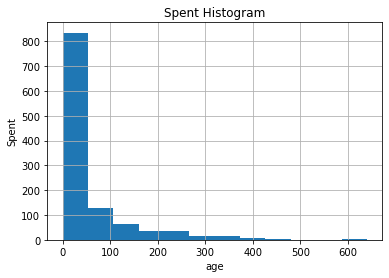

In [47]:
#Q8a)
hist_plot= data["Spent"].hist(bins=12)
hist_plot.set_title("Spent Histogram")
hist_plot.set_xlabel("age")
hist_plot.set_ylabel("Spent")

<AxesSubplot:xlabel='age', ylabel='Spent'>

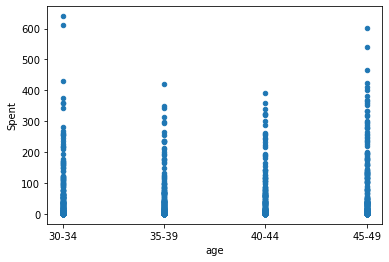

In [48]:
data.plot(x="age", y="Spent", kind= "scatter")

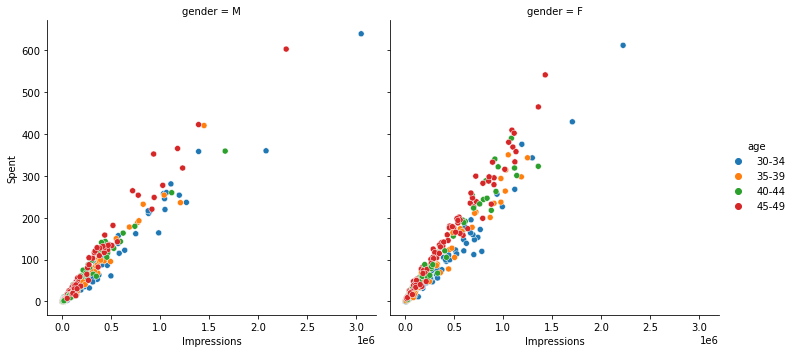

In [56]:
g = sns.relplot(x="Impressions", y="Spent", hue="age", data=data,col="gender")

#Q8b)
The company xyz is NOT gender biased interms of their advertisements. Their products are gender neutral actually.